In [1]:
import sympy as sym
from sympy.polys.multivariate_resultants import MacaulayResultant

sym.init_printing()

Macaulay Resultant
------------------

The Macauly resultant is a multivariate resultant. It is used for calculating the resultant of $n$ polynomials
in $n$ variables. The Macaulay resultant is calculated as the determinant of two matrices,

$$R = \frac{\text{det}(A)}{\text{det}(M)}.$$

Matrix $A$
-----------

There are a number of steps needed to contruct matrix $A$. Let us consider an example from https://dl.acm.org/citation.cfm?id=550525 to 
show the construction.

In [2]:
x, y, z = sym.symbols('x, y, z')

In [3]:
a_1_1, a_1_2, a_1_3, a_2_2, a_2_3, a_3_3 = sym.symbols('a_1_1, a_1_2, a_1_3, a_2_2, a_2_3, a_3_3')
b_1_1, b_1_2, b_1_3, b_2_2, b_2_3, b_3_3 = sym.symbols('b_1_1, b_1_2, b_1_3, b_2_2, b_2_3, b_3_3')
c_1, c_2, c_3 = sym.symbols('c_1, c_2, c_3')

In [4]:
variables = [x, y, z]

In [5]:
f_1 = a_1_1 * x ** 2 + a_1_2 * x * y + a_1_3 * x * z + a_2_2 * y ** 2 + a_2_3 * y * z + a_3_3 * z ** 2

In [6]:
f_2 = b_1_1 * x ** 2 + b_1_2 * x * y + b_1_3 * x * z + b_2_2 * y ** 2 + b_2_3 * y * z + b_3_3 * z ** 2

In [7]:
f_3 = c_1 * x + c_2 * y + c_3 * z

In [8]:
polynomials = [f_1, f_2, f_3]
mac = MacaulayResultant(polynomials, variables)

**Step 1** Calculated $d_i$ for $i \in n$. 

In [9]:
mac.degrees

**Step 2.** Get $d_M$.

In [10]:
mac.degree_m

**Step 3.** All monomials of degree $d_M$ and size of set.

In [11]:
mac.get_monomials_set()

In [12]:
mac.monomial_set

In [13]:
mac.monomials_size

These are the columns of matrix $A$.

**Step 4** Get rows and fill matrix.

In [14]:
mac.get_row_coefficients()

Each list is being multiplied by polynomials $f_1$, $f_2$ and $f_3$ equivalently. Then we fill the matrix
based on the coefficient of the monomials in the columns.

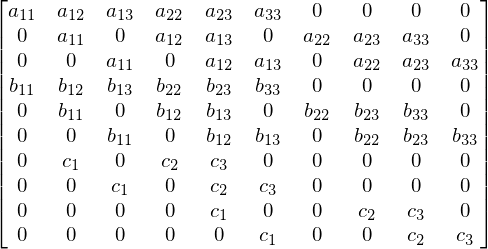

In [15]:
matrix = mac.get_matrix()
matrix

Matrix $M$
-----------

Columns that are non reduced are kept. The rows which contain one if the $a_i$s is dropoed.
$a_i$s are the coefficients of $x_i ^ {d_i}$.

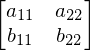

In [16]:
mac.get_submatrix(matrix)

Second example
-----------------
This is from: http://isc.tamu.edu/resources/preprints/1996/1996-02.pdf

In [17]:
x, y, z = sym.symbols('x, y, z')

In [18]:
a_0, a_1, a_2 = sym.symbols('a_0, a_1, a_2')
b_0, b_1, b_2 = sym.symbols('b_0, b_1, b_2')
c_0, c_1, c_2,c_3, c_4 = sym.symbols('c_0, c_1, c_2, c_3, c_4')

In [19]:
f = a_0 * y -  a_1 * x + a_2 * z
g = b_1 * x ** 2 + b_0 * y ** 2 - b_2 * z ** 2
h = c_0 * y - c_1 * x ** 3 + c_2 * x ** 2 * z - c_3 * x * z ** 2 + c_4 * z ** 3

In [20]:
polynomials = [f, g, h]

In [21]:
mac = MacaulayResultant(polynomials, variables=[x, y, z])

In [22]:
mac.degrees

In [23]:
mac.degree_m

In [24]:
mac.get_monomials_set()

In [25]:
mac.get_size()

In [26]:
mac.monomial_set

In [27]:
mac.get_row_coefficients()

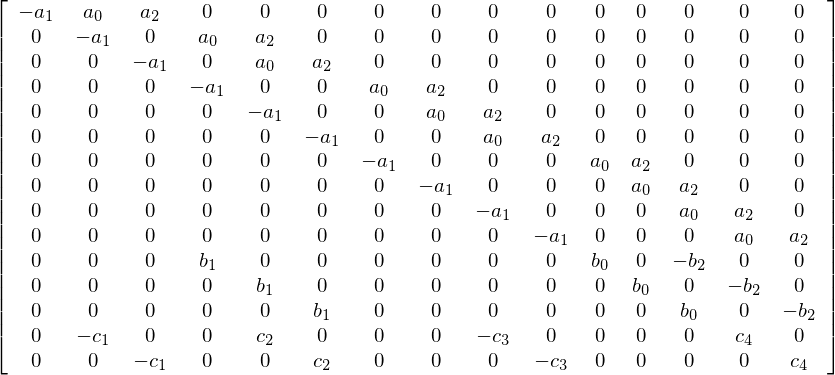

In [28]:
matrix = mac.get_matrix()
matrix

In [29]:
matrix.shape

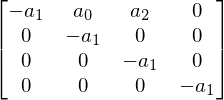

In [30]:
mac.get_submatrix(mac.get_matrix())